# Exploring Dandiset 001349: From Initial Formation to Developmental Refinement: GABAergic Inputs Shape Neuronal Subnetworks in the Primary Somatosensory Cortex

> **Note**: This notebook was generated with the assistance of AI. Please be cautious when interpreting the code or results and verify outputs independently.

## Overview

This notebook explores Dandiset 001349, which contains calcium imaging data from the somatosensory cortex in developing mice (P11-P21), along with behavioral recordings. The data was collected using two-photon awake imaging and was synchronized with behavioral video recordings.

[View the Dandiset on DANDI](https://dandiarchive.org/dandiset/001349/0.250520.1729)

In this notebook, we will:
1. Access and explore the dandiset metadata
2. Examine the structure of NWB files in the dataset
3. Load and visualize calcium imaging traces from neurons in the somatosensory cortex
4. Compare different signal processing methods (raw fluorescence, ΔF/F, z-scores, calcium events)
5. Analyze activity patterns across neurons

## Required Packages

In [1]:
# Import necessary packages
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from dandi.dandiapi import DandiAPIClient

## Exploring the Dandiset Metadata

Let's start by accessing the Dandiset's metadata to understand its content and purpose.

In [2]:
# Create a DANDI API client and get the dandiset metadata
client = DandiAPIClient()
dandiset = client.get_dandiset("001349", "0.250520.1729")
metadata = dandiset.get_raw_metadata()

print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"DOI: {metadata['doi']}")
print(f"License: {metadata['license'][0]}")

# Display description
print("\nDescription:")
print(metadata['description'])

Dandiset name: From Initial Formation to Developmental Refinement: GABAergic Inputs Shape Neuronal Subnetworks in the Primary Somatosensory Cortex
Dandiset URL: https://dandiarchive.org/dandiset/001349/0.250520.1729
DOI: 10.48324/dandi.001349/0.250520.1729
License: spdx:CC-BY-4.0

Description:
The calcium imaging data were obtained through two-photon awake imaging of the somatosensory cortex in developing mice from P11 to P21. Simultaneously, behavioral video recordings were collected from the experimental setup. The two modalities were synchronized using an LED signal at the start and end of the two-photon imaging experiment. Imaging data analysis was performed using Python or MATLAB, utilizing standard toolboxes, open-access toolboxes, and custom-written code.


## Exploring the Files in the Dandiset

Now let's look at the files available in this dandiset to get a better understanding of the data structure.

In [3]:
# List some assets in the dandiset to understand the file structure
assets = list(dandiset.get_assets())
print(f"Total number of files: {len(assets)}")

# Display the first 10 files to understand the naming pattern
print("\nSample of files in the dataset:")
for asset in assets[:10]:
    print(asset.path)

Total number of files: 361

Sample of files in the dataset:
sub-C57-C2-2-AL/sub-C57-C2-2-AL_ses-2_ophys.nwb
sub-C57-C2-2-AL/sub-C57-C2-2-AL_ses-1_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-2_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-3_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-0_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-4_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-1_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-11_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-12_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-13_ophys.nwb


## Examining the structure of an NWB file

Let's examine a single NWB file to understand its structure and the types of data it contains.

In [4]:
# Choose a file to explore
file_path = "sub-C57-C2-2-AL/sub-C57-C2-2-AL_ses-2_ophys.nwb"

# Look for the chosen file in the assets
asset = next(dandiset.get_assets_by_glob(file_path))
url = asset.download_url
print(f"Examining file: {file_path}")

# Open the remote file without downloading it
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display basic metadata about the file
print(f"\nSession description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject age: {nwb.subject.age}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Subject species: {nwb.subject.species}")
print(f"Keywords: {list(nwb.keywords[:])}")

Examining file: sub-C57-C2-2-AL/sub-C57-C2-2-AL_ses-2_ophys.nwb



Session description: CNOInjection: +; P15CNO: Neg
Identifier: C57-C2-2-AL_2
Session start time: 2021-10-29 00:00:00-05:00
Subject ID: C57-C2-2-AL
Subject age: P11D
Subject sex: F
Subject species: Mus musculus
Keywords: ['calcium imaging', 'behavior', 'pose estimation']


## Exploring the Calcium Imaging Data

Let's now examine the calcium imaging data available in the file. The NWB file contains various types of fluorescence signals:

- Raw fluorescence (`fluorescence_chn0`)
- Neuropil fluorescence (`neuropil_fluorescence_chn0`)
- Corrected fluorescence (`f_corrected_chn0`)
- ΔF/F (`dff_chn0`)
- Z-scores (`z_score_chn0`)
- Calcium events (`ca_events_chn0`)

Let's first check the basic properties of these data:

In [5]:
# Access the processing module that contains the calcium imaging data
ophys = nwb.processing["ophys"]
fluorescence = ophys.data_interfaces["Fluorescence"]

# Check what types of signals are available
print("Available signal types:")
for signal_name in fluorescence.roi_response_series:
    signal = fluorescence.roi_response_series[signal_name]
    print(f"- {signal_name}: {signal.description}, shape {signal.data.shape}")

# Get imaging parameters
imaging_plane = nwb.imaging_planes["ImagingPlane_1_chn1"]
print(f"\nImaging rate: {imaging_plane.imaging_rate} Hz")
print(f"Location: {imaging_plane.location}")

Available signal types:
- ca_events_chn0: Ca_Events, shape (4572, 143)
- dff_chn0: Dff, shape (4572, 143)
- f_corrected_chn0: F_Corrected, shape (4572, 143)
- fluorescence_chn0: Fluorescence, shape (4572, 143)
- neuropil_fluorescence_chn0: Neuropil_Fluorescence, shape (4572, 143)
- z_score_chn0: Z_Score, shape (4572, 143)

Imaging rate: 15.2309 Hz
Location: hemisphere: right, layer: 2, location_id: 2


## Visualizing Calcium Traces from Individual Neurons

Let's visualize calcium traces from a few example neurons to understand the data.

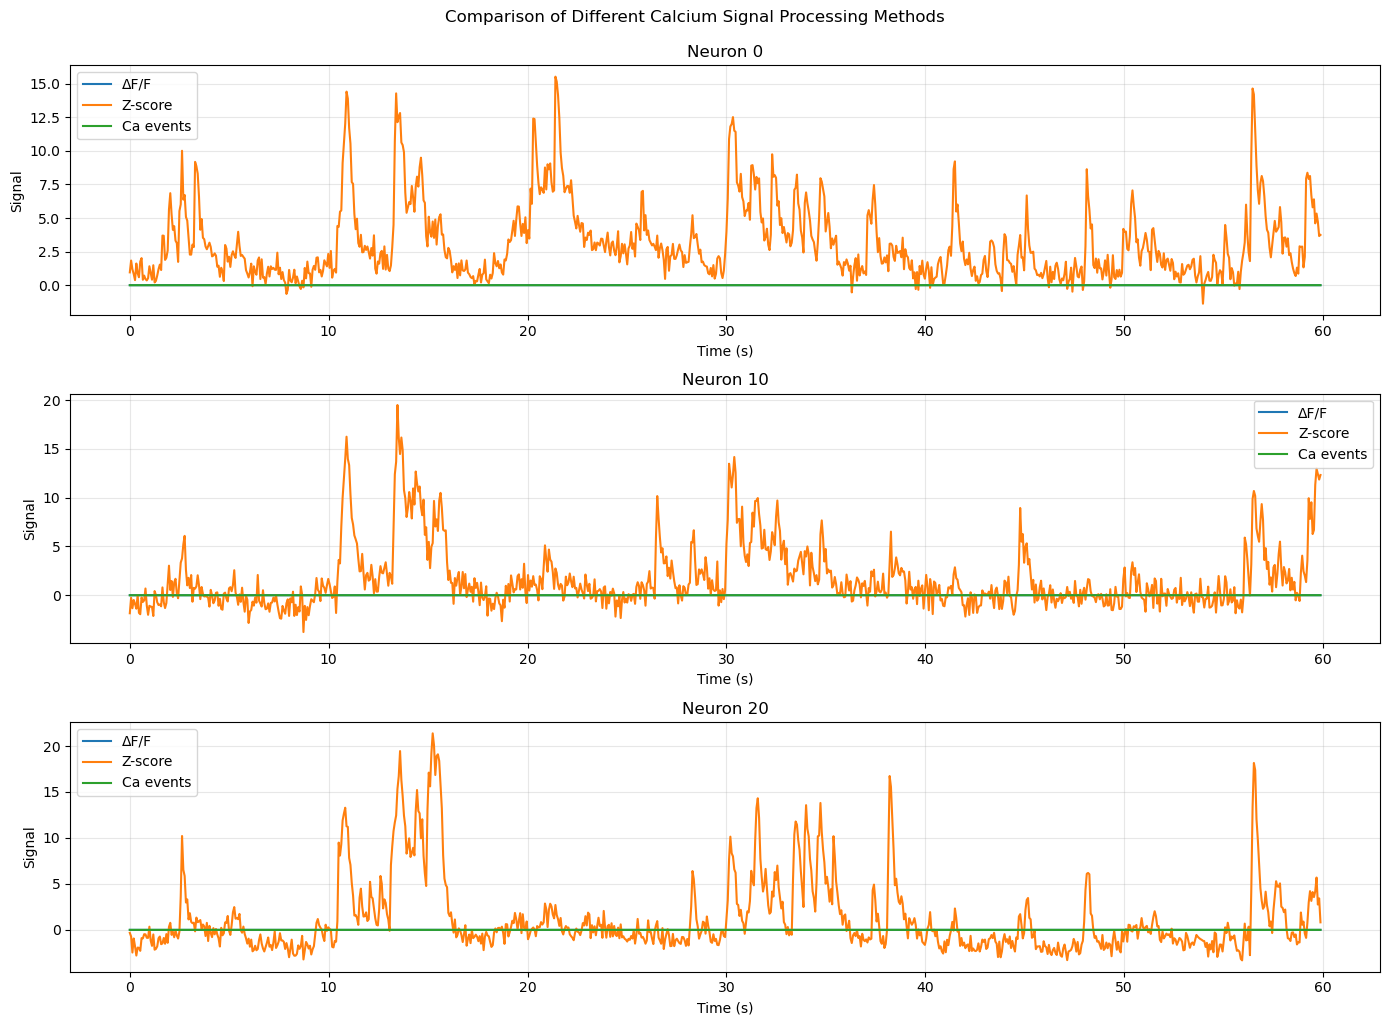

In [6]:
# Access the different types of calcium signals for comparison
dff = fluorescence.roi_response_series["dff_chn0"]
z_score = fluorescence.roi_response_series["z_score_chn0"]
ca_events = fluorescence.roi_response_series["ca_events_chn0"]
raw_f = fluorescence.roi_response_series["fluorescence_chn0"]

# Create a time vector (in seconds)
sampling_rate = dff.rate
time = np.arange(dff.data.shape[0]) / sampling_rate

# Select a few neurons to visualize
neurons_to_plot = [0, 10, 20]  # First few neurons
duration_to_plot = 60  # Plot 60 seconds of data
samples_to_plot = int(duration_to_plot * sampling_rate)

# Set up the figure for comparing signal types for one neuron
plt.figure(figsize=(14, 10))

for i, neuron_idx in enumerate(neurons_to_plot):
    plt.subplot(len(neurons_to_plot), 1, i+1)
    
    # Plot different types of signals
    plt.plot(time[:samples_to_plot], 
             dff.data[:samples_to_plot, neuron_idx], 
             label="ΔF/F")
    plt.plot(time[:samples_to_plot], 
             z_score.data[:samples_to_plot, neuron_idx], 
             label="Z-score")
    plt.plot(time[:samples_to_plot], 
             ca_events.data[:samples_to_plot, neuron_idx], 
             label="Ca events")
    
    plt.title(f"Neuron {neuron_idx}")
    plt.xlabel("Time (s)")
    plt.ylabel("Signal")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.suptitle("Comparison of Different Calcium Signal Processing Methods", y=1.02)
plt.show()

We can see different representations of the calcium signals. The ΔF/F shows relative changes in fluorescence, Z-scores standardize the signal, and calcium events represent detected transients.

## Visualizing Calcium Activity Across the Population

Next, let's visualize the activity of multiple neurons over time to get a sense of population dynamics.

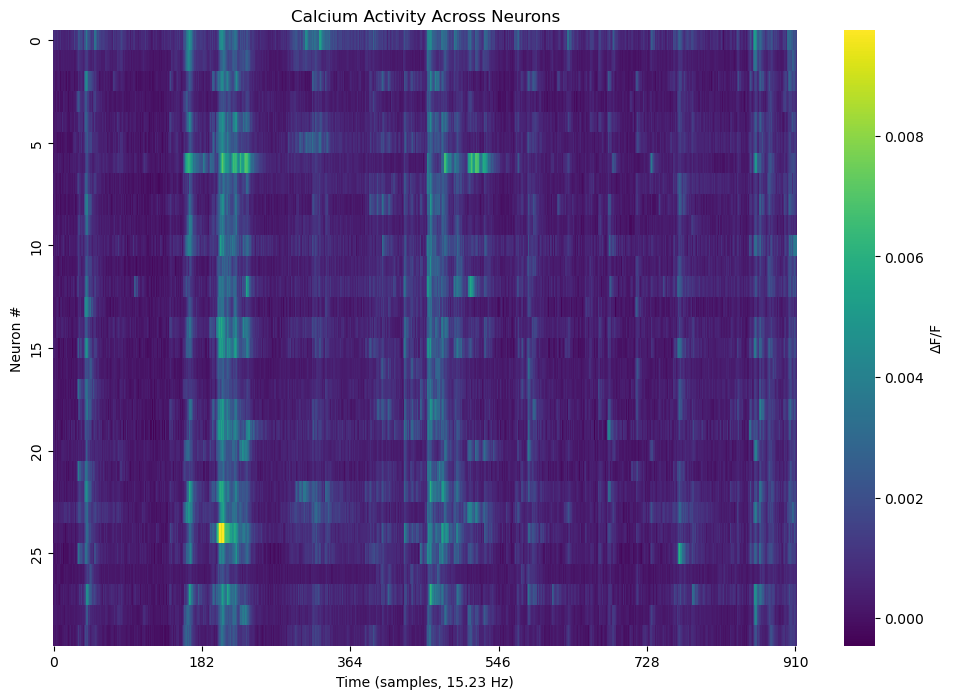

In [7]:
# Plot a heatmap of activity across neurons
plt.figure(figsize=(12, 8))

# Select a subset of neurons and time for visualization
num_neurons = 30  # Number of neurons to display
duration = 60  # Duration in seconds
time_samples = int(duration * sampling_rate)

# Create a heatmap of dF/F activity
sns.heatmap(dff.data[:time_samples, :num_neurons].T, 
            cmap="viridis", 
            xticklabels=int(time_samples/5),  # Show fewer x-ticks for clarity
            yticklabels=5,                    # Show fewer y-ticks for clarity
            cbar_kws={"label": "ΔF/F"})

plt.title("Calcium Activity Across Neurons")
plt.xlabel(f"Time (samples, {sampling_rate:.2f} Hz)")
plt.ylabel("Neuron #")
plt.show()

## Examining ROI Information

Let's examine the ROI (Region of Interest) information to understand the structure of the data.

In [8]:
# Access the plane segmentation which contains ROI information
plane_segmentation = ophys.data_interfaces["ImageSegmentation"].plane_segmentations["PlaneSegmentation_1"]

# Print basic information about the plane segmentation
print(f"Number of ROIs: {len(plane_segmentation.id)}")
print(f"Available ROI properties: {plane_segmentation.colnames}")

Number of ROIs: 143
Available ROI properties: ('pixel_mask',)


## Analyzing Neural Activity Patterns

Let's analyze some basic properties of the neural activity to understand activity patterns in the dataset.

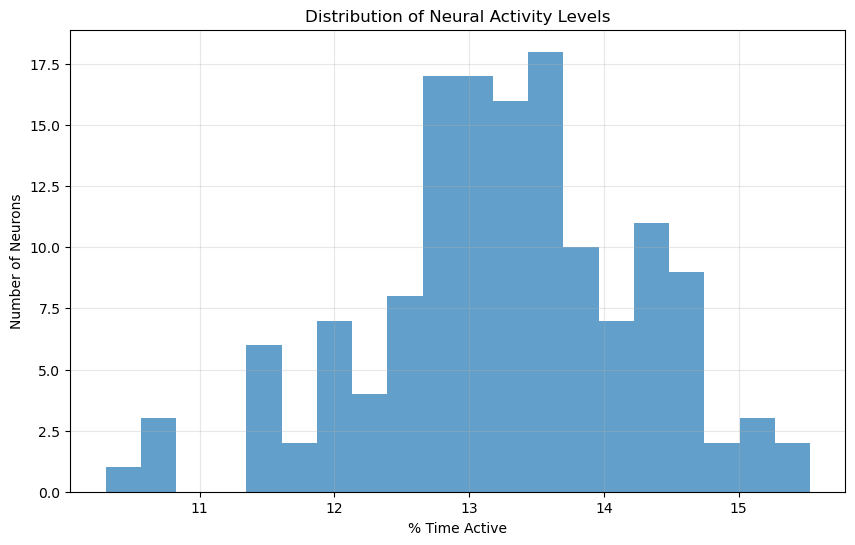

In [9]:
# Get ΔF/F data as a NumPy array for analysis
dff_data = dff.data[:]  # Convert to numpy array

# Calculate the fraction of time each neuron is "active"
# Define "active" as having ΔF/F values above a threshold
threshold = 1.0  # Standard deviations above means
active_threshold = np.mean(dff_data, axis=0) + threshold * np.std(dff_data, axis=0)
active_fraction = np.mean(dff_data > active_threshold[:, np.newaxis].T, axis=0)

# Plot the distribution of activity levels
plt.figure(figsize=(10, 6))
plt.hist(active_fraction * 100, bins=20, alpha=0.7)
plt.xlabel("% Time Active")
plt.ylabel("Number of Neurons")
plt.title("Distribution of Neural Activity Levels")
plt.grid(True, alpha=0.3)
plt.show()

## Examining Relationships Between Neurons

Let's look at correlations between different neurons to get a sense of functional connectivity.

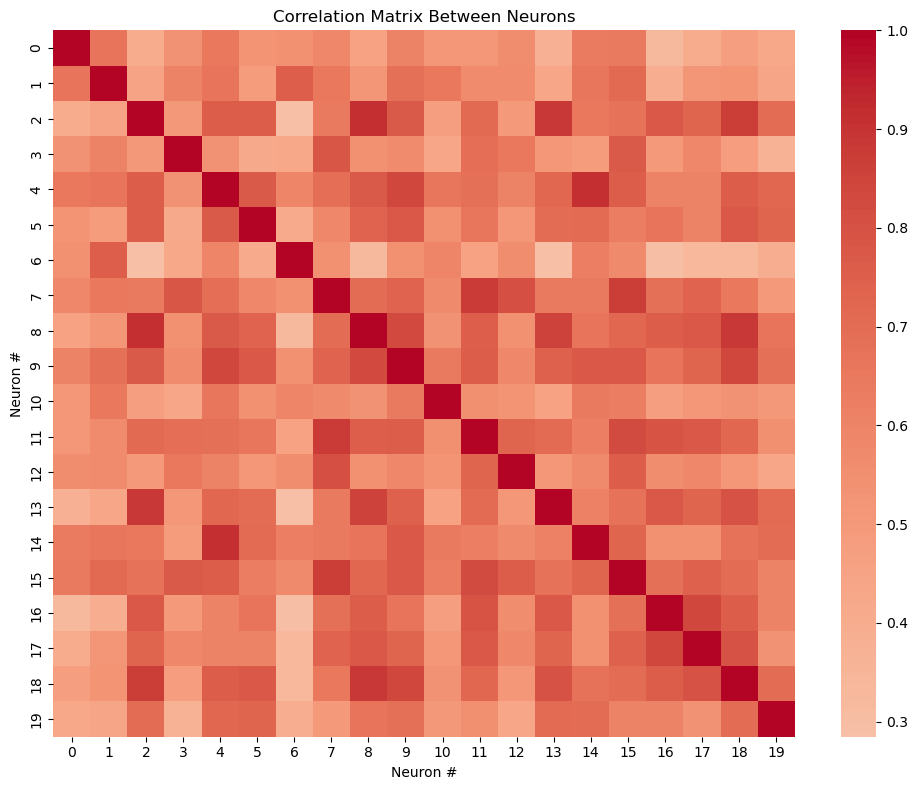

In [10]:
# Calculate correlation matrix between neurons using z-scored data
# Use a subset of neurons for clarity
num_neurons_for_corr = 20
z_data = z_score.data[:, :num_neurons_for_corr]

# Calculate correlation matrix
corr_matrix = np.corrcoef(z_data.T)

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, 
            xticklabels=range(num_neurons_for_corr),
            yticklabels=range(num_neurons_for_corr))
plt.title("Correlation Matrix Between Neurons")
plt.xlabel("Neuron #")
plt.ylabel("Neuron #")
plt.tight_layout()
plt.show()

## Comparing Activity Across All Neurons

Let's create a summary view of activity levels across all neurons to understand the overall distribution of activity in the dataset.

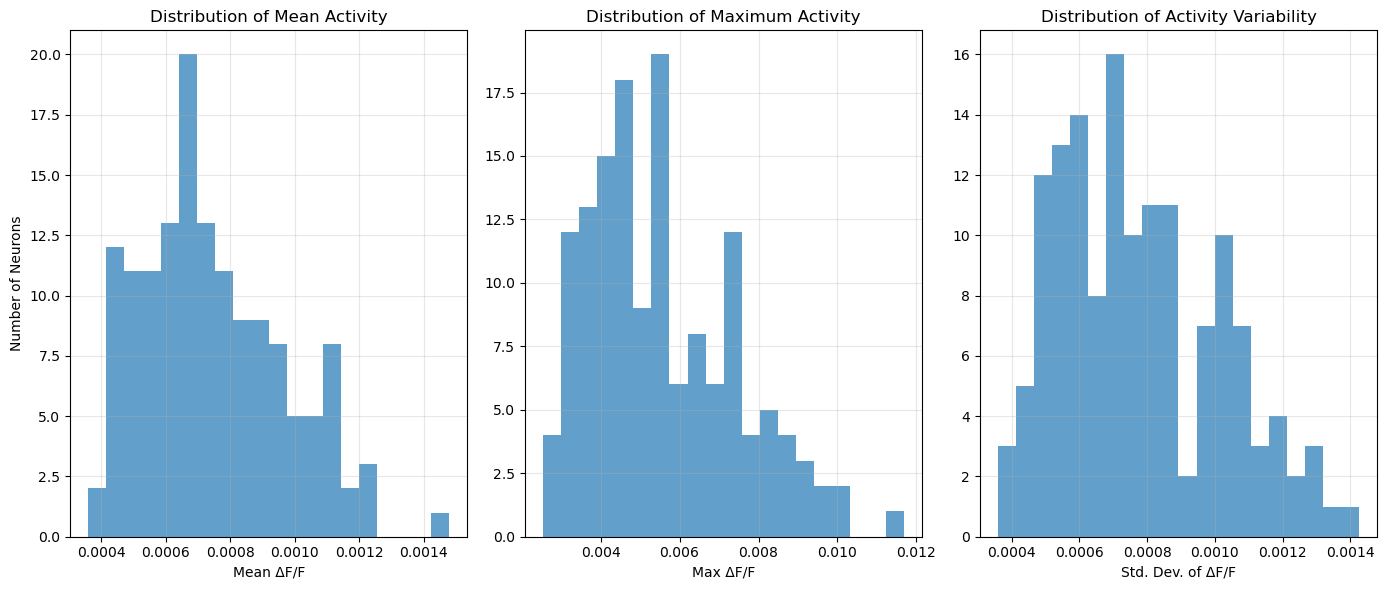

In [11]:
# Calculate summary statistics for each neuron
mean_dff = np.mean(dff_data, axis=0)
max_dff = np.max(dff_data, axis=0)
std_dff = np.std(dff_data, axis=0)

# Plot the distribution of mean activity
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.hist(mean_dff, bins=20, alpha=0.7)
plt.xlabel("Mean ΔF/F")
plt.ylabel("Number of Neurons")
plt.title("Distribution of Mean Activity")
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(max_dff, bins=20, alpha=0.7)
plt.xlabel("Max ΔF/F")
plt.title("Distribution of Maximum Activity")
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.hist(std_dff, bins=20, alpha=0.7)
plt.xlabel("Std. Dev. of ΔF/F")
plt.title("Distribution of Activity Variability")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Examining Temporal Patterns in Calcium Activity

Let's look at how calcium activity evolves over time by analyzing average activity across neurons.

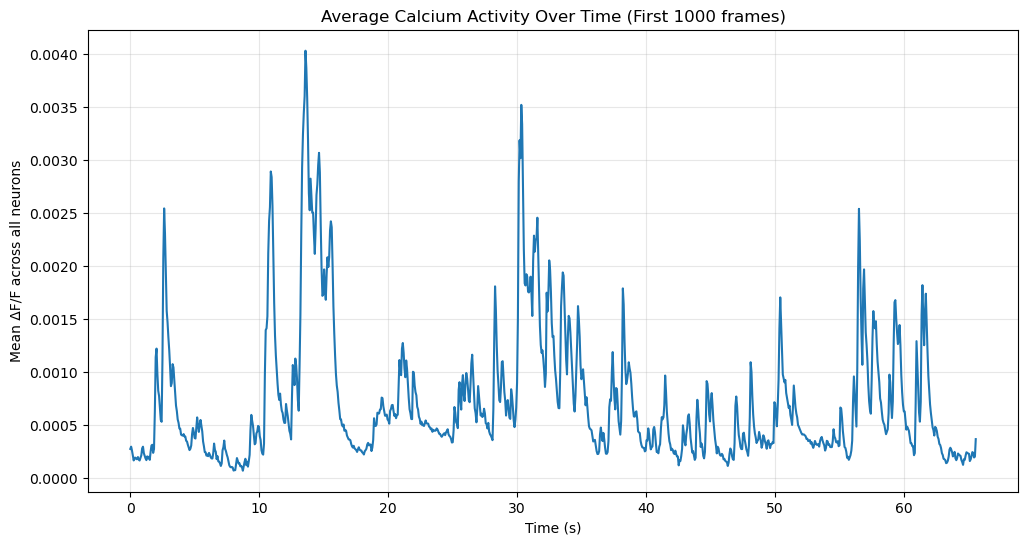

In [12]:
# Calculate the mean activity across all neurons at each time point
mean_activity_over_time = np.mean(dff_data, axis=1)  # Average across all neurons

# Plot the average activity over time
plt.figure(figsize=(12, 6))
plt.plot(time[:1000], mean_activity_over_time[:1000])
plt.title("Average Calcium Activity Over Time (First 1000 frames)")
plt.xlabel("Time (s)")
plt.ylabel("Mean ΔF/F across all neurons")
plt.grid(True, alpha=0.3)
plt.show()

## Capturing Variability in Neural Responses

Let's use Principal Component Analysis (PCA) to examine the main sources of variability in neural activity.

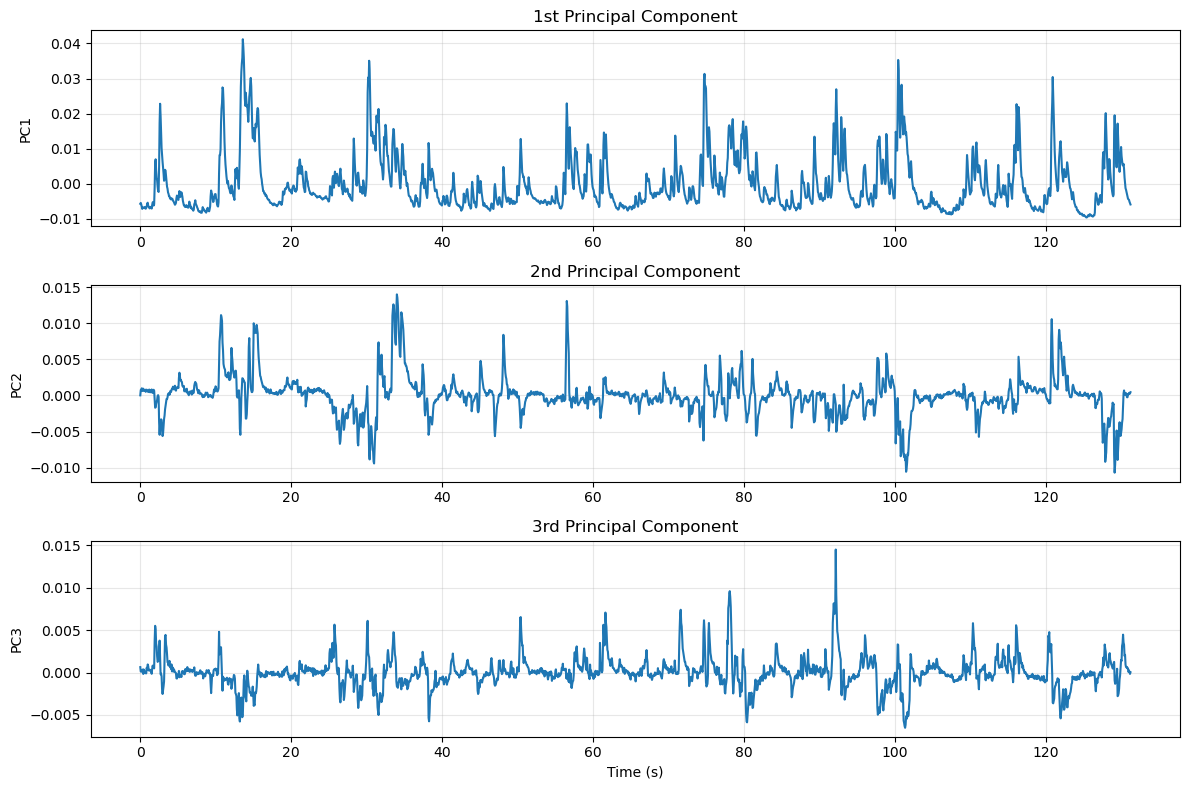

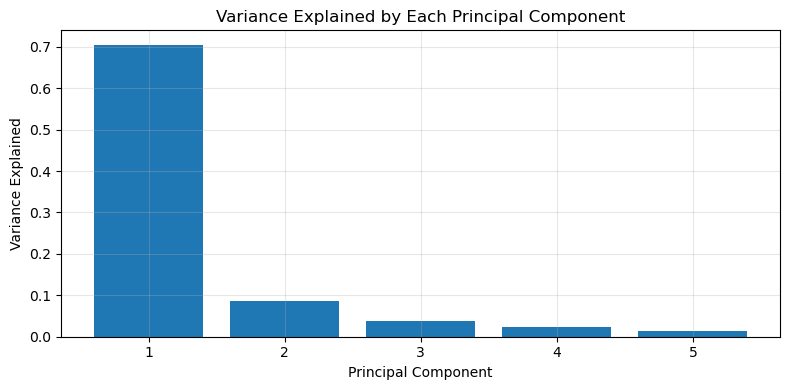

In [13]:
# Perform PCA on the dF/F data
from sklearn.decomposition import PCA

# Use a subset of data for computational efficiency
subset_length = 2000  # Use first 2000 timepoints
subset_data = dff_data[:subset_length, :]

# Center the data (PCA assumes zero mean)
centered_data = subset_data - np.mean(subset_data, axis=0)

# Fit PCA
pca = PCA(n_components=5)  # Look at top 5 components
pca_result = pca.fit_transform(centered_data)

# Plot the top 3 principal components over time
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time[:subset_length], pca_result[:, 0])
plt.title("1st Principal Component")
plt.ylabel("PC1")
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 2)
plt.plot(time[:subset_length], pca_result[:, 1])
plt.title("2nd Principal Component")
plt.ylabel("PC2")
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 3)
plt.plot(time[:subset_length], pca_result[:, 2])
plt.title("3rd Principal Component")
plt.xlabel("Time (s)")
plt.ylabel("PC3")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot variance explained
plt.figure(figsize=(8, 4))
plt.bar(range(1, 6), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Variance Explained by Each Principal Component")
plt.xticks(range(1, 6))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Summary

In this notebook, we've explored Dandiset 001349, which contains calcium imaging data from the somatosensory cortex of developing mice. We've examined:

- The structure of the NWB files and the metadata they contain
- Different signal processing methods for calcium imaging data
- Basic properties of calcium events and neuronal activity
- Correlations between neurons and population activity patterns
- Main sources of variability in neural responses

Further analyses could explore:
- Changes in activity patterns across different ages (P11-P21)
- Correlations between neural activity and behavior
- Differences in activity patterns between experimental groups
- Network analyses to identify functional subgroups of neurons